In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
import re
from string import punctuation
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df = df.drop(columns=['JerseyNumber', 'Location', 'PlayerCollegeName', 'WindDirection'])
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8


In [84]:
df.tail(25)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Stadium,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,BMI,TimeDelta,IsBallCarrier
509737,2018123015,20181230154135,home,84.19,26.77,1.75,0.85,0.20,110.27,9.23,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,36.975674,1.0,False
509738,2018123015,20181230154135,home,84.36,42.29,1.56,1.58,0.15,93.31,89.70,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,29.156057,1.0,False
509739,2018123015,20181230154135,home,81.19,23.75,4.23,2.43,0.41,66.34,41.24,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,30.959333,1.0,True
509740,2018123015,20181230154157,away,86.64,28.20,0.21,0.89,0.04,234.21,82.18,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,41.867556,2.0,False
509741,2018123015,20181230154157,away,90.09,42.83,3.11,2.47,0.31,175.02,130.60,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,26.779696,2.0,False
509742,2018123015,20181230154157,away,88.22,28.05,1.08,2.78,0.11,242.66,114.87,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,28.728030,2.0,False
509743,2018123015,20181230154157,away,85.82,30.07,1.29,1.35,0.11,205.86,247.08,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,31.420982,2.0,False
509744,2018123015,20181230154157,away,87.48,23.67,1.13,1.88,0.11,311.08,16.33,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,30.297297,2.0,False
509745,2018123015,20181230154157,away,99.14,29.81,1.97,1.40,0.19,256.20,248.21,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,27.043535,2.0,False
509746,2018123015,20181230154157,away,87.86,27.40,1.35,2.17,0.12,222.14,76.87,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,27.835053,2.0,False


In [3]:
def clean_StadiumType(text):
    text = str(text)
    text = text.replace('Retractable Roof', 'Retractable Roof - Closed')
    text = text.replace('Outdoors', 'Outdoor')
    text = text.replace('Ourdoor', 'Outdoor')
    text = text.replace('Outdor', 'Outdoor') 
    text = text.replace('Oudoor', 'Outdoor') 
    text = text.replace('Bowl', 'Outdoor') 
    text = text.replace('Heinz Field', 'Outdoor') 
    text = text.replace('Cloudy', 'Outdoor') 
    text = text.replace('Open', 'Outdoor') 
    text = text.replace('Outddors', 'Outdoor')
    text = text.replace('Outside', 'Outdoor') 
    text = text.replace('Indoors', 'Indoor') 
    text = text.replace('Dome', 'Indoor') 
    text = text.replace('Domed, closed', 'Indoor') 
    text = text.replace('Closed Dome', 'Indoor') 
    text = text.replace('Domed', 'Indoor') 
    text = text.replace('Dome, closed', 'Indoor') 
    text = text.replace('Indoor, Roof Closed', 'Retractable Roof - Closed') 
    text = text.replace('Indoor, Outdoor Roof', 'Indoor') 
    text = text.replace('Domed, Outdoor', 'Indoor') 
    text = text.replace('Indoord, open', 'Retractable Roof - Open') 
    text = text.replace('Closed Indoor', 'Retractable Roof - Closed') 
    text = text.replace('Indoor, closed', 'Retractable Roof - Closed') 
    text = text.replace('Retr. Roof - Outdoor', 'Retractable Roof - Open') 
    text = text.replace('Retr. Roof-Outdoor', 'Retractable Roof - Open') 
    text = text.replace('Indoord', 'Indoor') 
    text = text.replace('Retr. Roof-Closed', 'Retractable Roof - Closed') 
    text = text.replace('Retr. Roof - Closed', 'Retractable Roof - Closed') 
    text = text.replace('Retr. Roof Closed', 'Retractable Roof - Closed') 
    text = text.replace('Outdoor Retr Roof-Outdoor', 'Retractable Roof - Open') 
    text = text.replace('Indoor, Outdoor', 'Indoor') 
    text = text.replace('Indoor, closed', 'Retractable Roof - Closed') 
    text = text.replace('nan', 'Outdoor') 
    return text

In [4]:
def clean_PossessionTeam(text):
    text = str(text)
    text = text.replace('ARZ', 'ARI')
    text = text.replace('BLT', 'BAL') 
    text = text.replace('CLV', 'CLE') 
    text = text.replace('HST', 'HOU') 
    return text

In [5]:
def clean_FieldPosition(text):
    text = str(text)
    text = text.replace('ARZ', 'ARI')
    text = text.replace('BLT', 'BAL') 
    text = text.replace('CLV', 'CLE') 
    text = text.replace('HST', 'HOU') 
    
    return text

In [6]:
def clean_Turf(text):
    
    text = str(text.title())
    text = text.replace('Fieldturf', 'Field Turf')
    text = text.replace('Natural Grass', 'Grass') 
    text = text.replace('Artifical', 'Field Turf') 
    text = text.replace('Artificial', 'Field Turf')
    text = text.replace('Naturall Grass', 'Grass') 
    text = text.replace('Natural', 'Grass') 
    text = text.replace('Sisgrass', 'Dd Grassmaster') 
    text = text.replace('Field Turf360', 'Field Turf') 
    text = text.replace('Field Turf 360', 'Field Turf') 
    text = text.replace('Ubu Speed Series-S5-M', 'Ubu Sports Speed S5-M') 
    text = text.replace('Twenty-Four/Seven Turf', 'Field Turf') 
    
    return text

In [7]:
def clean_Stadium(text):
    
    text = text.replace('Sports Authority Field at Mile High', 'Broncos Stadium') 
    text = text.replace('Broncos Stadium At Mile High', 'Broncos Stadium') 
    text = text.replace('Broncos Stadium at Mile High', 'Broncos Stadium') 
    text = text.replace('Mercedes-Benz Dome', 'Mercedes-Benz Superdome') 
    text = text.replace('MetLife', 'MetLife Stadium') 
    text = text.replace('Metlife Stadium', 'MetLife Stadium') 
    text = text.replace('NRG', 'NRG Stadium') 
    text = text.replace('M & T Bank Stadium', 'M&T Bank Stadium')
    text = text.replace('Paul Brown Stadium', 'Paul Brown Stdium') 
    text = text.replace('NRG Stadium Stadium', 'NRG Stadium') 
    text = text.replace('Lambeau field', 'Lambeau Field') 
    text = text.replace('CenturyField', 'CenturyLink Field') 
    text = text.replace('CenturyLink', 'CenturyLink Field') 
    text = text.replace('MetLife Stadium Stadium', 'MetLife Stadium') 
    text = text.replace('FirstEnergyStadium', 'FirstEnergy Stadium') 
    text = text.replace('FirstEnergy', 'FirstEnergy Stadium') 
    text = text.replace('M&T Stadium', 'M&T Bank Stadium') 
    text = text.replace('FirstEnergy Stadium Stadium', 'FirstEnergy Stadium') 
    text = text.replace('Everbank Field', 'EverBank Field') 
    text = text.replace('TIAA Bank Field', 'EverBank Field') 
    text = text.replace('CenturyLink Field Field', 'CenturyLink Field')
    text = text.replace('Twickenham', 'Twickenham Stadium')
    text = text.replace('University of Phoenix Stadium', 'State Farm Stadium')
    text = text.replace('First Energy Stadium', 'FirstEnergy Stadium') 
    text = text.replace('Oakland-Alameda County Coliseum', 'Oakland Alameda-County Coliseum') 
    text = text.replace('Los Angeles Memorial Coliesum', 'Los Angeles Memorial Coliseum') 
    text = text.replace('Twickenham Stadium Stadium', 'Twickenham Stadium') 
    
    return text

In [8]:
def clean_GameWeather(text):
    
    text = str(text).title() 
    text = text.replace('T: 51; H: 55; W: Nw 10 Mph', 'Windy') 
    text = text.replace('Sunny, Windy', 'Windy') 
    text = text.replace('Cloudy With Periods Of Rain, Thunder Possible. Winds Shifting To Wnw, 10-20 Mph.', 'Windy') 
    text = text.replace('Controlled Climate', 'Indoor') 
    text = text.replace('Indoors', 'Indoor')
    text = text.replace('N/A (Indoors)', 'Indoor') 
    text = text.replace('N/A Indoor', 'Indoor') 
    text = text.replace('Clear And Warm', 'Sunny') 
    text = text.replace('Sun & Clouds', 'Sunny')
    text = text.replace('Mostly Sunny', 'Sunny') 
    text = text.replace('Sunny, Highs To Upper 80S', 'Sunny') 
    text = text.replace('Partly Cloudy', 'Sunny') 
    text = text.replace('Clear Skies', 'Sunny') 
    text = text.replace('Party Cloudy', 'Sunny') 
    text = text.replace('Clear And Sunny', 'Sunny') 
    text = text.replace('Mostly Sunny', 'Sunny') 
    text = text.replace('Sunny And Warm', 'Sunny') 
    text = text.replace('Clear And Sunny', 'Sunny') 
    text = text.replace('Sunny And clear', 'Sunny') 
    text = text.replace('Mostly Sunny Skies', 'Sunny') 
    text = text.replace('Sunny Skies', 'Sunny') 
    text = text.replace('Clear', 'Sunny') 
    text = text.replace('Partly Cloudy', 'Cloudy') 
    text = text.replace('Mostly Cloudy', 'Cloudy') 
    text = text.replace('Partly Sunny', 'Cloudy') 
    text = text.replace('Fair', 'Cloudy') 
    text = text.replace('Hazy', 'Cloudy')
    text = text.replace('Overcast', 'Cloudy') 
    text = text.replace('Sunny And Cold', 'Sunny') 
    text = text.replace('Sunny Skies', 'Sunny') 
    text = text.replace('Cloudy And Cool', 'Cloudy') 
    text = text.replace('Mostly Coudy', 'Cloudy') 
    text = text.replace('Cloudy And Cold', 'Cloudy') 
    text = text.replace('Partly Clouidy', 'Cloudy') 
    text = text.replace('Cloudy, Fog Started Developing In 2Nd Quarter', 'Cloudy') 
    text = text.replace('Sunny And Cool', 'Sunny') 
    text = text.replace('Coudy', 'Cloudy')
    text = text.replace('Sunny And Sunny', 'Sunny') 
    text = text.replace('N/A (Indoor)', 'Indoor') 
    text = text.replace('Light Rain', 'Rain') 
    text = text.replace('Showers', 'Rain') 
    text = text.replace('30% Chance Of Rain', 'Rain') 
    text = text.replace('Rain Likely, Temps In Low 40S.', 'Rain') 
    text = text.replace('Cloudy, Chance Of Rain', 'Rain') 
    text = text.replace('Scattered Showers', 'Rain') 
    text = text.replace('Rain Chance 40%', 'Rain')
    text = text.replace('Cloudy, 50% Change Of Rain', 'Rain') 
    text = text.replace('Cloudy, Rain', 'Rain') 
    text = text.replace('Rain Shower', 'Rain') 
    text = text.replace('Rainy', 'Rain') 
    text = text.replace('Heavy Lake Effect Snow', 'Snow') 
    text = text.replace('Cloudy, Light Snow Accumulating 1-3"', 'Snow') 
    text = text.replace('Scattered Rain', 'Rain') 
    
    return text
    

In [9]:
def clean_WindSpeed(text):
    
    text = str(text).upper()
    text = text.replace('SSW', '5') 
    text = text.replace('CALM', '5') 
    text = text.replace('NAN', '5') 
    text = text.replace('E', '5') 
    text = text.replace('N', '5') 
    text = text.replace('S', '5') 
    text = text.replace('W', '5') 
    text = text.replace('NW', '5') 
    text = text.replace('SW', '5')
    text = text.replace('-', ' ')
    text = text.replace('.', ' ')
    text = text.strip("QWERTYUIOPASDGFHJKLZXCMVNB")
    text = text[:2]
    text = float(text)
    
    return text

In [10]:
# Applying all the functions above and cleaning all the features
df['StadiumType'] = df['StadiumType'].apply(clean_StadiumType)
df['PossessionTeam'] = df['PossessionTeam'].apply(clean_PossessionTeam)
df['FieldPosition'] = df['FieldPosition'].apply(clean_FieldPosition)
df['Turf'] = df['Turf'].apply(clean_Turf)
df['Stadium'] = df['Stadium'].apply(clean_Stadium)
df['GameWeather'] = df['GameWeather'].apply(clean_GameWeather)
df['WindSpeed'] = df['WindSpeed'].apply(clean_WindSpeed)
df['FieldPosition'] = np.where(df["FieldPosition"] == 'nan', df['HomeTeamAbbr'], df['FieldPosition'])

In [11]:
# Filling in the Temperature Na values - average indoor temp is 68 and retractable open in 65
df.loc[(df.StadiumType == 'Indoor') | 
                    (df.StadiumType == 'Retractable Roof - Closed'), 'Temperature'] = '68'
df.loc[(df.StadiumType == 'Retractable Roof - Open'), 'Temperature'] = '65'
df['Temperature'] = [float(x) for x in df['Temperature']]

In [12]:
# Doing the same thing as above, but this time its for average humidity
df.loc[(df.StadiumType == 'Indoor') | 
                    (df.StadiumType == 'Retractable Roof - Closed'), 'Humidity'] = '45'
df.loc[(df.StadiumType == 'Retractable Roof - Open'), 'Humidity'] = '60'
df['Humidity'] = [float(x) for x in df['Humidity']]

In [13]:
# Now filling in windspeed, using .1 rather than 0 to have it not be a null, but carries small significance 
df.loc[(df.StadiumType == 'Indoor') | 
                    (df.StadiumType == 'Retractable Roof - Closed'), 'WindSpeed'] = '.1'
df.loc[(df.StadiumType == 'Retractable Roof - Open'), 'WindSpeed'] = '.1'
df['WindSpeed'] = [float(x) for x in df['WindSpeed']]

In [14]:
# Labeling the weather given StadiumType, WindSpeed and Temperature
df.loc[(df.StadiumType == 'Indoor') | 
                    (df.StadiumType == 'Retractable Roof - Closed'), 'GameWeather'] = 'Indoor'
df.loc[(df.StadiumType == 'Retractable Roof - Open'), 'GameWeather'] = 'Sunny'
df.loc[(df.StadiumType == 'Outdoor') & (df["WindSpeed"] > 9.9), 'GameWeather'] = 'Windy'
df.loc[(df.StadiumType == 'Outdoor') & (df["Temperature"] < 41), 'GameWeather'] = 'Cold'
df.loc[(df.StadiumType == 'Outdoor') & (df["GameWeather"] == 'Nan'), 'GameWeather'] = 'Sunny'

In [20]:
# Because Quarter is a feature, we can just make convert this column into seconds that are left in the quarter
def GameClock_seconds(text):
    text = text.split(':')
    seconds = int(text[0])*60 + int(text[1]) + int(text[2])/60
    return seconds

In [28]:
df['GameClock'] = df['GameClock'].apply(GameClock_seconds)

In [22]:
# Getting the BMI for the players 
df['PlayerHeight'] = df['PlayerHeight'].apply(lambda x: 12*int(x.split('-')[0])+int(x.split('-')[1]))
df['BMI'] = 703*(df['PlayerWeight']/(df['PlayerHeight'])**2)

In [23]:
df['BMI'].describe()

count    509762.000000
mean         32.011825
std           4.769579
min          22.722973
25%          27.891291
50%          31.001126
75%          36.397929
max          46.107253
Name: BMI, dtype: float64

In [24]:
# Converting the time features into datetime
df['TimeHandoff'] = df['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
df['TimeSnap'] = df['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))

In [25]:
df['TimeHandoff']

0        2017-09-08 00:44:06
1        2017-09-08 00:44:06
2        2017-09-08 00:44:06
3        2017-09-08 00:44:06
4        2017-09-08 00:44:06
5        2017-09-08 00:44:06
6        2017-09-08 00:44:06
7        2017-09-08 00:44:06
8        2017-09-08 00:44:06
9        2017-09-08 00:44:06
10       2017-09-08 00:44:06
11       2017-09-08 00:44:06
12       2017-09-08 00:44:06
13       2017-09-08 00:44:06
14       2017-09-08 00:44:06
15       2017-09-08 00:44:06
16       2017-09-08 00:44:06
17       2017-09-08 00:44:06
18       2017-09-08 00:44:06
19       2017-09-08 00:44:06
20       2017-09-08 00:44:06
21       2017-09-08 00:44:06
22       2017-09-08 00:44:27
23       2017-09-08 00:44:27
24       2017-09-08 00:44:27
25       2017-09-08 00:44:27
26       2017-09-08 00:44:27
27       2017-09-08 00:44:27
28       2017-09-08 00:44:27
29       2017-09-08 00:44:27
                 ...        
509732   2018-12-31 00:24:11
509733   2018-12-31 00:24:11
509734   2018-12-31 00:24:11
509735   2018-

In [29]:
df['TimeSnap']

0        2017-09-08 00:44:05
1        2017-09-08 00:44:05
2        2017-09-08 00:44:05
3        2017-09-08 00:44:05
4        2017-09-08 00:44:05
5        2017-09-08 00:44:05
6        2017-09-08 00:44:05
7        2017-09-08 00:44:05
8        2017-09-08 00:44:05
9        2017-09-08 00:44:05
10       2017-09-08 00:44:05
11       2017-09-08 00:44:05
12       2017-09-08 00:44:05
13       2017-09-08 00:44:05
14       2017-09-08 00:44:05
15       2017-09-08 00:44:05
16       2017-09-08 00:44:05
17       2017-09-08 00:44:05
18       2017-09-08 00:44:05
19       2017-09-08 00:44:05
20       2017-09-08 00:44:05
21       2017-09-08 00:44:05
22       2017-09-08 00:44:26
23       2017-09-08 00:44:26
24       2017-09-08 00:44:26
25       2017-09-08 00:44:26
26       2017-09-08 00:44:26
27       2017-09-08 00:44:26
28       2017-09-08 00:44:26
29       2017-09-08 00:44:26
                 ...        
509732   2018-12-31 00:24:10
509733   2018-12-31 00:24:10
509734   2018-12-31 00:24:10
509735   2018-

In [30]:
# Creating a new feature that is the time between the snap and the handoff
# When t=0, it must be wildcat formation or less than .5 seconds until the handoff
df['TimeDelta'] = df.apply(lambda row: (row['TimeHandoff'] - row['TimeSnap']).total_seconds(), axis=1)

In [33]:
df["PlayDirection"].value_counts()

left     256454
right    253308
Name: PlayDirection, dtype: int64

In [34]:
df['IsBallCarrier'] = df['NflId'] == df['NflIdRusher']

In [36]:
df.isna().sum()

GameId                      0
PlayId                      0
Team                        0
X                           0
Y                           0
S                           0
A                           0
Dis                         0
Orientation                18
Dir                        14
NflId                       0
DisplayName                 0
Season                      0
YardLine                    0
Quarter                     0
GameClock                   0
PossessionTeam              0
Down                        0
Distance                    0
FieldPosition               0
HomeScoreBeforePlay         0
VisitorScoreBeforePlay      0
NflIdRusher                 0
OffenseFormation          110
OffensePersonnel            0
DefendersInTheBox          66
DefensePersonnel            0
PlayDirection               0
TimeHandoff                 0
TimeSnap                    0
Yards                       0
PlayerHeight                0
PlayerWeight                0
PlayerBirt

In [38]:
single_play = df[df['PlayId'] == 20181230154157]

In [85]:
run_before = df[df['PlayId'] == 20181230154135]

In [86]:
sea_run_before = run_before[run_before['Team'] == 'home']

In [74]:
single_play['Team']

509740    away
509741    away
509742    away
509743    away
509744    away
509745    away
509746    away
509747    away
509748    away
509749    away
509750    away
509751    home
509752    home
509753    home
509754    home
509755    home
509756    home
509757    home
509758    home
509759    home
509760    home
509761    home
Name: Team, dtype: object

In [75]:
az_players = single_play[single_play['Team'] == 'away']
sea_players = single_play[single_play['Team'] == 'home']

In [76]:
az_players.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Stadium,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,BMI,TimeDelta,IsBallCarrier
509740,2018123015,20181230154157,away,86.64,28.20,0.21,0.89,0.04,234.21,82.18,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,41.867556,2.0,False
509741,2018123015,20181230154157,away,90.09,42.83,3.11,2.47,0.31,175.02,130.60,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,26.779696,2.0,False
509742,2018123015,20181230154157,away,88.22,28.05,1.08,2.78,0.11,242.66,114.87,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,28.728030,2.0,False
509743,2018123015,20181230154157,away,85.82,30.07,1.29,1.35,0.11,205.86,247.08,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,31.420982,2.0,False
509744,2018123015,20181230154157,away,87.48,23.67,1.13,1.88,0.11,311.08,16.33,...,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,30.297297,2.0,False


In [94]:
sea_run_before[['X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'DisplayName', 'Down', 'Distance', 'YardLine', 'GameClock', 'TimeSnap', 'TimeHandoff', 'TimeDelta', 'Yards']]

,X,Y,S,A,Dis,Orientation,Dir,DisplayName,Down,Distance,YardLine,GameClock,TimeSnap,TimeHandoff,TimeDelta,Yards
509729,83.49,28.99,3.04,2.66,0.38,352.20,353.66,Duane Brown,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509730,84.06,22.27,3.65,0.69,0.36,50.61,358.07,Ed Dickson,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509731,82.20,36.31,3.25,1.87,0.32,81.27,338.02,Doug Baldwin,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509732,80.62,23.88,0.46,0.33,0.04,108.28,127.18,Russell Wilson,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509733,84.09,25.66,1.72,0.55,0.17,30.21,359.17,Justin Britt,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509734,84.23,7.77,2.26,0.36,0.22,73.19,102.30,Tyler Lockett,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509735,84.96,24.77,2.79,1.13,0.29,71.79,19.98,Germain Ifedi,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509736,84.90,23.78,3.74,0.84,0.38,44.13,15.99,George Fant,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509737,84.19,26.77,1.75,0.85,0.20,110.27,9.23,Ethan Pocic,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509738,84.36,42.29,1.56,1.58,0.15,93.31,89.70,David Moore,1,10,25,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2


In [95]:
sea_players[['X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'DisplayName', 'Down', 'Distance', 'YardLine', 'GameClock', 'TimeSnap', 'TimeHandoff', 'TimeDelta', 'Yards']]

,X,Y,S,A,Dis,Orientation,Dir,DisplayName,Down,Distance,YardLine,GameClock,TimeSnap,TimeHandoff,TimeDelta,Yards
509751,85.12,29.18,0.96,1.04,0.10,81.51,221.23,Duane Brown,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509752,86.76,22.02,2.58,0.74,0.26,65.37,41.26,Ed Dickson,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509753,81.82,26.99,3.08,1.43,0.32,213.67,266.73,Russell Wilson,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509754,87.34,41.37,3.96,1.48,0.39,139.94,136.00,Jaron Brown,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509755,86.00,27.50,0.06,0.72,0.02,42.87,86.49,Justin Britt,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509756,85.68,24.31,1.04,0.35,0.10,43.66,326.53,Joey Hunt,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509757,86.77,24.20,2.14,2.12,0.22,44.55,15.31,Nick Vannett,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509758,86.76,27.18,1.16,0.66,0.11,53.63,42.80,Germain Ifedi,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509759,87.26,27.05,2.59,1.18,0.26,3.96,21.12,George Fant,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509760,84.57,24.37,4.36,1.79,0.47,148.08,183.34,Ethan Pocic,2,8,23,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11


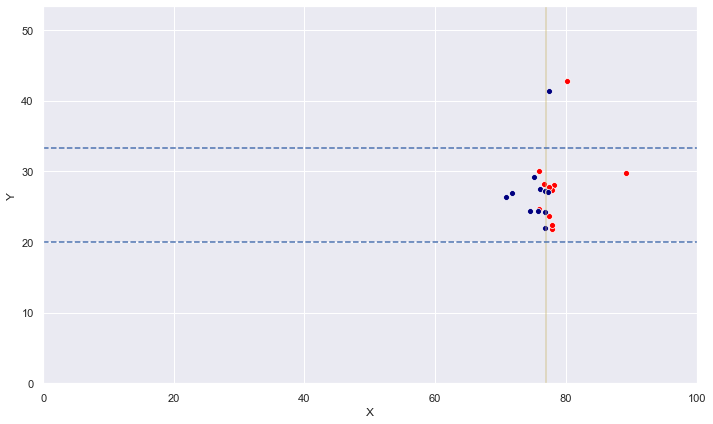

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(az_players['X'] - 10, az_players['Y'], marker='o', color='red')
sns.scatterplot(sea_players['X'] - 10, sea_players['Y'], marker='o', color='navy')
# plt.plot(single_play['YardLine'], axis=0)
plt.tight_layout()
plt.ylim(0,53.33)
plt.xlim(0,100)
plt.axvline(100 - single_play['YardLine'][509740], alpha=.5, color='y')
plt.axhline(53.33 - 20, linestyle='--')
plt.axhline(20, linestyle='--')

# //////////////

In [ ]:
# Cleaning process for temp, humidity, windy and other na values

In [157]:
weather_stadium.loc[(weather_stadium.StadiumType == 'Indoor') | 
                    (weather_stadium.StadiumType == 'Retractable Roof - Closed'), 'temp'] = '68'
weather_stadium.loc[(weather_stadium.StadiumType == 'Retractable Roof - Open'), 'temp'] = '65'

In [145]:
weather_stadium['temp'] = weather_stadium['temp'].fillna(weather_stadium['Temperature'])

In [150]:
weather_stadium['temp'] = [float(x) for x in weather_stadium['temp']]

In [152]:
weather_stadium['temp'].describe()

count    509762.000000
mean         61.412930
std          15.819644
min          10.000000
25%          51.000000
50%          68.000000
75%          69.000000
max          97.000000
Name: temp, dtype: float64

In [153]:
weather_stadium['temp'].isna().sum()

0

In [155]:
weather_stadium.Humidity.isna().sum()

6160

In [158]:
weather_stadium.loc[(weather_stadium.StadiumType == 'Indoor') | 
                    (weather_stadium.StadiumType == 'Retractable Roof - Closed'), 'humid'] = '45'
weather_stadium.loc[(weather_stadium.StadiumType == 'Retractable Roof - Open'), 'humid'] = '60'

In [160]:
weather_stadium['humid'] = weather_stadium['humid'].fillna(weather_stadium['Humidity'])

In [165]:
weather_stadium['humid'] = [float(x) for x in weather_stadium['humid']]

In [166]:
weather_stadium['humid'].describe()

count    509762.000000
mean         57.113677
std          18.755477
min           0.000000
25%          45.000000
50%          54.000000
75%          70.000000
max         100.000000
Name: humid, dtype: float64

In [167]:
weather_stadium.isna().sum()

GameWeather        0
StadiumType        0
Temperature    48532
Humidity        6160
WindSpeed      67430
temp               0
humid              0
dtype: int64

In [168]:
weather_stadium.loc[(weather_stadium.StadiumType == 'Indoor') | 
                    (weather_stadium.StadiumType == 'Retractable Roof - Closed'), 'wind'] = '.1'
weather_stadium.loc[(weather_stadium.StadiumType == 'Retractable Roof - Open'), 'wind'] = '.1'

In [169]:
weather_stadium['wind'] = weather_stadium['wind'].fillna(weather_stadium['WindSpeed'])

In [171]:
weather_stadium['wind'] = weather_stadium['wind'].apply(clean_WindSpeed)

In [173]:
weather_stadium['wind'].describe()

count    509762.000000
mean          6.026197
std           5.193192
min           0.000000
25%           1.000000
50%           5.000000
75%           9.000000
max          55.000000
Name: wind, dtype: float64

In [175]:
weather_stadium['GameWeather'].unique()

array(['Sunny', 'Indoor', 'Nan', 'Cloudy', 'Rain', 'Windy', 'Cold',
       'Snow'], dtype=object)

In [176]:
weather_stadium.loc[(weather_stadium.StadiumType == 'Indoor') | 
                    (weather_stadium.StadiumType == 'Retractable Roof - Closed'), 'game_weather_new'] = 'Indoor'
weather_stadium.loc[(weather_stadium.StadiumType == 'Retractable Roof - Open'), 'game_weather_new'] = 'Sunny'
weather_stadium.loc[(weather_stadium.StadiumType == 'Outdoor') & (weather_stadium["wind"] > 9.9), 'game_weather_new'] = 'Windy'

In [177]:
weather_stadium['game_weather_new'].isna().sum()

270270

In [178]:
weather_stadium['game_weather_new'] = weather_stadium['game_weather_new'].fillna(weather_stadium['GameWeather'])

In [179]:
weather_stadium['game_weather_new'].isna().sum()

0

In [180]:
weather_stadium.isna().sum()

GameWeather             0
StadiumType             0
Temperature         48532
Humidity             6160
WindSpeed           67430
temp                    0
humid                   0
wind                    0
game_weather_new        0
dtype: int64

In [181]:
df['Humidity'].isna().sum()

6160